# Proyecto 01 - Predicción de Revenue (Amazon Sales)

**Objetivo:** Predecir las ganancias usando variables de precio, descuento, cantidad, rating y variables categóricas como categoría, región y método de pago.


### Importación de librerias

In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Carga del dataset

In [23]:
Amazon_sales = pd.read_csv("amazon_sales_dataset.csv")
Amazon_sales.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


### Estructura del dataset

In [24]:
Amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


### Revisión de valores nulos


In [25]:
Amazon_sales.isna().sum()


order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

### Descripcón del dataset
Se analizan medidas como:

- Media
- Desviación estándar
- Valores mínimos y máximos


In [26]:
Amazon_sales.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


### Transformación de fecha
'order_date' se convierte a formato datetime para tener 
- Año
- Mes

In [27]:
Amazon_sales["order_date"] = pd.to_datetime(Amazon_sales["order_date"])

Amazon_sales["order_year"] = Amazon_sales["order_date"].dt.year
Amazon_sales["order_month"] = Amazon_sales["order_date"].dt.month



### Definición de Variables

Las variables independientes (X) serán todas, excluyendo:

- order_id
- product_id
- order_date
- total_revenue

La variable dependiente (y) será:

- total_revenue



In [28]:
X = Amazon_sales.drop(columns=[
    "order_id",
    "product_id",
    "order_date",
    "total_revenue",
    "discounted_price",
    "product_category",
    "customer_region",
    "payment_method"
])
y = Amazon_sales["total_revenue"]

### Dividir el dataset

- 80% entrenamiento
- 20% prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Modelo = LinearRegression()
Modelo.fit(X_train, y_train)
y_pred = Modelo.predict(X_test)



### Modelo lineal

In [30]:
Modelo = LinearRegression()
Modelo.fit(X_train, y_train)
y_pred = Modelo.predict(X_test)

coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": Modelo.coef_
})

coeficientes


,Variable,Coeficiente
0,price,2.614207
1,discount_percent,-7.641015
2,quantity_sold,220.702597
3,rating,-0.391372
4,review_count,0.005928
5,order_year,-2.625537
6,order_month,-0.182068


In [31]:
Modelo.intercept_


np.float64(4748.081644405935)

In [32]:
r2 = r2_score(y_test, y_pred)
r2


0.8706926495958518

### Interpretacion de R^2

El modelo lineal obtuvo un R² de 0.8706

Esto significa que el modelo explica aproximadamente ___% de la variación del total_revenue.

# Penalizacion

In [33]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Ridge
modelo_ridge = Ridge(alpha=1)
modelo_ridge.fit(X_train, y_train)
pred_ridge = modelo_ridge.predict(X_test)
r2_ridge = r2_score(y_test, pred_ridge)

# Lasso
modelo_lasso = Lasso(alpha=1)
modelo_lasso.fit(X_train, y_train)
pred_lasso = modelo_lasso.predict(X_test)
r2_lasso = r2_score(y_test, pred_lasso)

# ElasticNet
modelo_en = ElasticNet(alpha=1, l1_ratio=0.5)
modelo_en.fit(X_train, y_train)
pred_en = modelo_en.predict(X_test)
r2_en = r2_score(y_test, pred_en)

r2_ridge, r2_lasso, r2_en

(0.8706928167185226, 0.8707580442079689, 0.8589029032495713)

### Tabla comparativa

In [34]:
resultados_modelo1 = pd.DataFrame({
    "Modelo": ["Lineal", "Ridge", "Lasso", "ElasticNet"],
    "R2": [r2, r2_ridge, r2_lasso, r2_en]
})

resultados_modelo1

,Modelo,R2
0,Lineal,0.870693
1,Ridge,0.870693
2,Lasso,0.870758
3,ElasticNet,0.858903


### Grafica R2

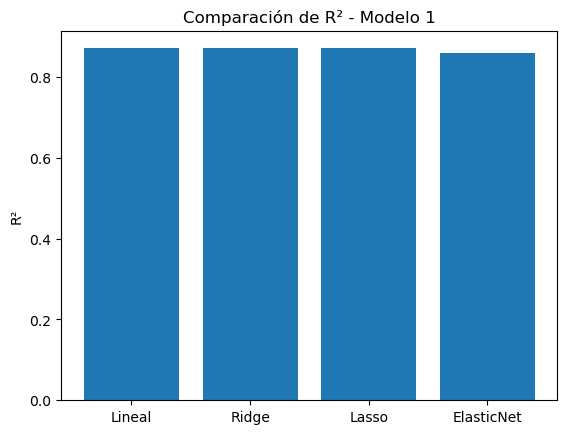

In [35]:
import matplotlib.pyplot as plt

plt.bar(resultados_modelo1["Modelo"], resultados_modelo1["R2"])
plt.title("Comparación de R² - Modelo 1")
plt.ylabel("R²")
plt.show()

### Modelo 1, 4 versiones

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return r2_score(y_test, pred)

# Modelo 1: Lineal (ya lo tienes, pero lo dejamos aquí para compararlo igual)
m1_lin = LinearRegression()
r2_m1_lin = eval_model(m1_lin, X_train, X_test, y_train, y_test)

# Ridge / Lasso / ElasticNet con escalamiento
m1_ridge = Pipeline([("scaler", StandardScaler()), ("model", Ridge(alpha=1.0))])
m1_lasso = Pipeline([("scaler", StandardScaler()), ("model", Lasso(alpha=0.01, max_iter=10000))])
m1_en    = Pipeline([("scaler", StandardScaler()), ("model", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))])

r2_m1_ridge = eval_model(m1_ridge, X_train, X_test, y_train, y_test)
r2_m1_lasso = eval_model(m1_lasso, X_train, X_test, y_train, y_test)
r2_m1_en    = eval_model(m1_en, X_train, X_test, y_train, y_test)

resultados_m1 = pd.DataFrame({
    "Modelo": ["M1-Lineal", "M1-Ridge", "M1-Lasso", "M1-ElasticNet"],
    "R2": [r2_m1_lin, r2_m1_ridge, r2_m1_lasso, r2_m1_en]
})
resultados_m1

,Modelo,R2
0,M1-Lineal,0.870693
1,M1-Ridge,0.870694
2,M1-Lasso,0.870694
3,M1-ElasticNet,0.870842


### Modelo 2, 4 versiones

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# ---------- Helper para evaluar ----------
def fit_r2(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return r2_score(y_test, pred)

# ---------- Construcción POLINOMIAL (a mano) ----------
X_poly = X.copy()

for col in X.columns:
    X_poly[f"{col}_sq"] = X_poly[col] ** 2

# Split con las nuevas variables
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Modelos (4 versiones)
m2_lin   = LinearRegression()
m2_ridge = Pipeline([("scaler", StandardScaler()), ("model", Ridge(alpha=1.0))])
m2_lasso = Pipeline([("scaler", StandardScaler()), ("model", Lasso(alpha=0.01, max_iter=20000))])
m2_en    = Pipeline([("scaler", StandardScaler()), ("model", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=20000))])

r2_m2_lin   = fit_r2(m2_lin,   X_train_p, X_test_p, y_train_p, y_test_p)
r2_m2_ridge = fit_r2(m2_ridge, X_train_p, X_test_p, y_train_p, y_test_p)
r2_m2_lasso = fit_r2(m2_lasso, X_train_p, X_test_p, y_train_p, y_test_p)
r2_m2_en    = fit_r2(m2_en,    X_train_p, X_test_p, y_train_p, y_test_p)

resultados_m2 = pd.DataFrame({
    "Modelo": ["M2-Polinomial", "M2-Polinomial-Ridge", "M2-Polinomial-Lasso", "M2-Polinomial-ElasticNet"],
    "R2": [r2_m2_lin, r2_m2_ridge, r2_m2_lasso, r2_m2_en]
})

resultados_m2

,Modelo,R2
0,M2-Polinomial,0.870688
1,M2-Polinomial-Ridge,0.870688
2,M2-Polinomial-Lasso,0.870688
3,M2-Polinomial-ElasticNet,0.870364


### Modelo 3, 4 versiones

In [38]:
from itertools import combinations

X_inter = X.copy()

# Interacciones por pares (todas las combinaciones de columnas)
for c1, c2 in combinations(X.columns, 2):
    X_inter[f"{c1}_x_{c2}"] = X_inter[c1] * X_inter[c2]

# Split con interacciones
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_inter, y, test_size=0.2, random_state=42
)

# Modelos (4 versiones)
m3_lin   = LinearRegression()
m3_ridge = Pipeline([("scaler", StandardScaler()), ("model", Ridge(alpha=1.0))])
m3_lasso = Pipeline([("scaler", StandardScaler()), ("model", Lasso(alpha=0.01, max_iter=20000))])
m3_en    = Pipeline([("scaler", StandardScaler()), ("model", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=20000))])

r2_m3_lin   = fit_r2(m3_lin,   X_train_i, X_test_i, y_train_i, y_test_i)
r2_m3_ridge = fit_r2(m3_ridge, X_train_i, X_test_i, y_train_i, y_test_i)
r2_m3_lasso = fit_r2(m3_lasso, X_train_i, X_test_i, y_train_i, y_test_i)
r2_m3_en    = fit_r2(m3_en,    X_train_i, X_test_i, y_train_i, y_test_i)

resultados_m3 = pd.DataFrame({
    "Modelo": ["M3-Interacciones", "M3-Interacciones-Ridge", "M3-Interacciones-Lasso", "M3-Interacciones-ElasticNet"],
    "R2": [r2_m3_lin, r2_m3_ridge, r2_m3_lasso, r2_m3_en]
})

resultados_m3

,Modelo,R2
0,M3-Interacciones,0.998459
1,M3-Interacciones-Ridge,0.998459
2,M3-Interacciones-Lasso,0.998460
3,M3-Interacciones-ElasticNet,0.998288


### Tabla final todos los R2

In [39]:
import matplotlib.pyplot as plt

resultados_all = pd.concat([resultados_m1, resultados_m2, resultados_m3], ignore_index=True)
resultados_all = resultados_all.sort_values("R2", ascending=False)

resultados_all

,Modelo,R2
10,M3-Interacciones-Lasso,0.998460
9,M3-Interacciones-Ridge,0.998459
8,M3-Interacciones,0.998459
11,M3-Interacciones-ElasticNet,0.998288
3,M1-ElasticNet,0.870842
2,M1-Lasso,0.870694
1,M1-Ridge,0.870694
0,M1-Lineal,0.870693
4,M2-Polinomial,0.870688
5,M2-Polinomial-Ridge,0.870688


### Grafica de todos los R2

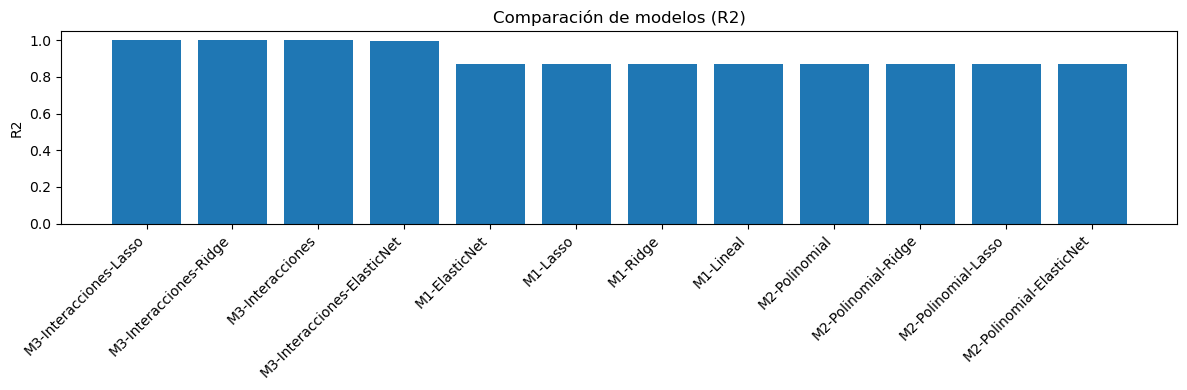

In [40]:
plt.figure(figsize=(12,4))
plt.bar(resultados_all["Modelo"], resultados_all["R2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("R2")
plt.title("Comparación de modelos (R2)")
plt.tight_layout()
plt.show()

### Significancia de factores

In [41]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)     # añade intercepto
ols = sm.OLS(y_train, X_sm).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 4.056e+04
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:53:29   Log-Likelihood:            -2.6565e+05
No. Observations:               40000   AIC:                         5.313e+05
Df Residuals:                   39992   BIC:                         5.314e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4748.0816   3749.686  